# Multi-layer Forward-feed NN 
## NN on Handwritten Digits

In [2]:
%matplotlib inline
# All imports

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.preprocessing import label_binarize

np.set_printoptions(formatter={'float': '{:.5f}'.format})

## Multiple-label Classification -- Example: Handwritten Digits

In [3]:
'''

Find out what the object digits contain

Plot first 4 digits in handwritten dataset.

'''
# Import datasets, classifiers and performance metrics
from sklearn import datasets

# The digits dataset
digits = datasets.load_digits()

# digits are of a sklearn defned class: Bunch
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [3]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
type(digits.data)

numpy.ndarray

In [6]:
digits.data.shape

(1797, 64)

In [7]:
type(digits.images)

numpy.ndarray

In [8]:
digits.images.shape

(1797, 8, 8)

In [9]:
type(digits.target)

numpy.ndarray

In [10]:
digits.target.shape

(1797,)

## Mini-breakout 1

## Show one of the images (say the 14th one), and use the target value as the title for your plot

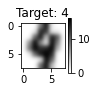

In [4]:
digimg = digits.images
targets = digits.target

idx_select = 14
plt.figure(figsize=(1,1))
plt.imshow(digimg[idx_select], cmap = plt.cm.gray_r, interpolation='Gaussian')
plt.colorbar()
plt.title('Target: {}'.format(targets[idx_select]))
plt.show()

# arr_2d = X[50].reshape(8, 8)
# plt.imshow(arr_2d, cmap = 'gray_r')
# dig = digits.target
# print(dig[50])

## Mini-breakout 2
## Show that digits.image and digits.data are the same thing, just shaped differently by showing one of the images (say the 14th one), using both .data and .image.

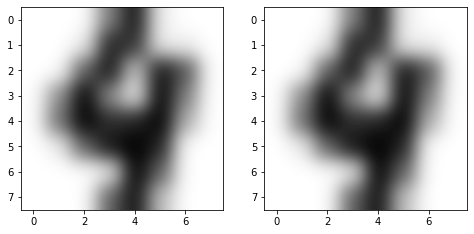

In [5]:
digimg = digits.images
digimg2 = digits.data
targets = digits.target

idx_select = 14
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.imshow(digimg[idx_select], cmap = plt.cm.gray_r, interpolation='Gaussian')
# plt.title('Target: {}'.format(targets[idx_select]))
# plt.show()
# plt.figure(figsize=(1,1))
ax2.imshow(digimg2[idx_select].reshape(8, 8), cmap = plt.cm.gray_r, interpolation='Gaussian')
# plt.colorbar()
# plt.title('Target: {}'.format(targets[idx_select]))
# plt.title('Data')
plt.show()

## Breakout

## a) Show the first 8 of the images in 2 rows, with 4 images in each row.
## b) Use the target value as the title for your plot.
## c) Remove the x and y axes around each image.

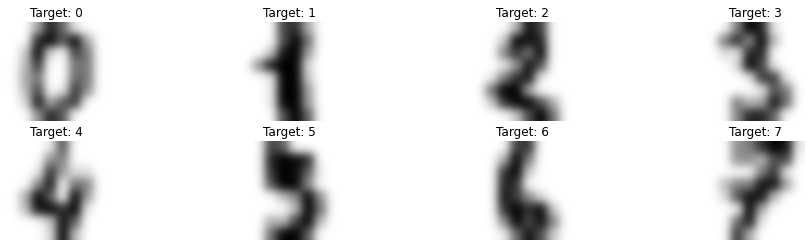

In [6]:
fig = plt.figure(figsize=(16,4))
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    ax = fig.add_subplot(2, 4, index+1)
    plt.axis('off')
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation='Gaussian')
    plt.title('Target: {}'.format(label))
plt.show()

In [ ]:
plt.plot()

In [76]:
# def plot_digits(X, nside, cmap = 'binary'):
#     fig, axes = plt.subplots(nside, nside*2, figsize=(8, 8))
    
#     # keeping the first nside^2 terms.
#     X = X[:nside*(nside*2)]
    
#     # Ask yourself: what's the shape of X?  (nside**2, 64)
#     # reshape simultaneously reshapes both dimensions of X.
#     # Also: note the usage of 8, -1
#     X = np.reshape(X, (nside, nside*2, 8, -1))
#     for i in range(nside):
#         for j in range(nside*2):
#             axes[i, j].imshow(X[i, j], cmap = cmap)
#             axes[i, j].set_xticks([])
#             axes[i, j].set_yticks([])
# #     im = np.row_stack([np.column_stack([X[i, j] for j in range(nside)])
# #                     for i in range(nside*2)])
# #     plt.imshow(im, cmap = cmap)
    
# plot_digits(X, nside = 2)

## Breakout Exercise

## Instantiate a NN classifier, clf
## Decide on NN structure
## Train it on one digit, say the 14th.

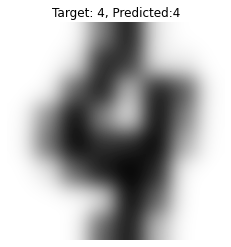

In [7]:
idx_select = 14
digimg = digits.images[idx_select]
y = np.atleast_1d(digits.target[idx_select])
X = np.atleast_2d(digits.data[idx_select])

clf = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(2, 2), activation = 'tanh', \
                    random_state=5, max_iter=10000, learning_rate_init=0.1)

clf.fit(X, y)
# print(digimg)
training_predict = clf.predict(X)

plt.imshow(digimg, cmap = plt.cm.gray_r, interpolation='Gaussian')
plt.title('Target: {}, Predicted:{}'.format(y[0], training_predict[0]))
plt.axis('off')
plt.show()



In [8]:
digimg = digits.data

clf = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(2, 2), activation = 'tanh', \
                    random_state=5, max_iter=10000, learning_rate_init=0.1)

clf.fit([digimg[14]], [targets[14]])
# print(digimg)
clf.predict([digimg[14]])[0]

4

## Breakout Exercise

- ### Instantiate a NN classifier, clf
- ### Train it on first 100 digits
- ### Test the trained model on next 100 digits.
- ### Report on training and validation scores

- ### Repeat above steps by training on first 500 digits, and test the model on next 500 digits.
- ### Show examples of four images from the training set in a 1 x 4 arrangement of subplots with the predicted classification in the title
- ### Do the same for four images from the validation set

data.shape:(1000, 64)
Training score 0.982
Validation score 0.724


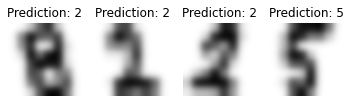

In [9]:
n_samples = 1000
data_sub = digits.data[:n_samples]
digimgs_sub = digits.images[:n_samples]

y_sub = digits.target[:n_samples]
X_sub = data_sub

print('data.shape:{}'.format(X_sub.shape))

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4), activation = 'relu', \
                    random_state=5, max_iter=10000, learning_rate_init=0.1)

clf.fit(X_sub[:n_samples//2], y_sub[:n_samples//2])
print('Training score', clf.score(X_sub[:n_samples//2], y_sub[:n_samples//2]))

expected = y_sub[n_samples//2:] #testing set
predicted = clf.predict(X_sub[n_samples//2:])
print('Validation score', clf.score(X_sub[n_samples//2:], y_sub[n_samples//2:]))

images_and_predictions = list(zip(digimgs_sub[n_samples//2:], predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(1, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='gaussian')
    plt.title('Prediction: {}'.format(prediction))
    
plt.show()

data.shape:(1797, 64)
Training score 0.9988864142538976
Validation score 0.8665183537263627


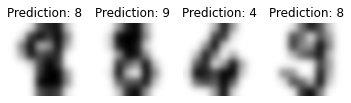

In [10]:
n_samples = 1797
data_sub = digits.data[:n_samples]
digimgs_sub = digits.images[:n_samples]

y_sub = digits.target[:n_samples]
X_sub = data_sub

print('data.shape:{}'.format(X_sub.shape))

clf = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(20,10), activation = 'relu', \
                    random_state=5, max_iter=10000, learning_rate_init=0.1)

clf.fit(X_sub[:n_samples//2], y_sub[:n_samples//2])
print('Training score', clf.score(X_sub[:n_samples//2], y_sub[:n_samples//2]))

expected = y_sub[n_samples//2:] #testing set
predicted = clf.predict(X_sub[n_samples//2:])
print('Validation score', clf.score(X_sub[n_samples//2:], y_sub[n_samples//2:]))

images_and_predictions = list(zip(digimgs_sub[n_samples//2:], predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(1, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='gaussian')
    plt.title('Prediction: {}'.format(prediction))
    
plt.show()
                

In [32]:
# clf = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(4, 2, 2), activation = 'tanh', \
#                     random_state=5, max_iter=10000, learning_rate_init=0.1)

# reg = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(1,), activation='tanh',\
#                     random_state=1, max_iter=1000000, learning_rate_init=0.1)
# reg.hidden_layer_size=(100,)
# # reg.alpha=0.2

# training = []
# target = []

# for i in range(100):
#     training.append(digits.data[i])
#     target.append(digits.target[i])
# clf.fit(training, target)

# plt.imshow(image, cmap = plt.cm.gray_r, interpolation='Gaussian')
# plt.title('Target: {}'.format(label))
# plt.axis('off')


# reg.fit(training, target)
# print('Score', reg.score(training, target))
# print("Loss function", reg.loss_)

# for i in range(100, 105):
    
#     test = [digits.data[i]]
#     correct = digits.target[i]
#     training_predict = clf.predict(test)
#     print('Prediction: {}\nCorrect: {}'.format(clf.predict(test), correct))
#     plt.imshow(digimg, cmap = plt.cm.gray_r, interpolation='Gaussian')
#     plt.title('Target: {}, Predicted:{}'.format(target[i], training_predict[i]))
#     plt.axis('off')
#     plt.show()

    



Find out what the object digits contain

Plot first 4 digits in handwritten dataset.




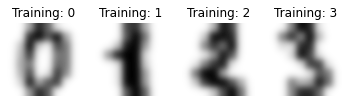

Finished Training


In [11]:
print(__doc__)

n_samples=len(digits.images)
data = digits.images.reshape(n_samples, -1)

classifier = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(20, 10), activation = 'tanh', \
                    random_state=5, max_iter=1000000, learning_rate_init=0.1)
classifier.fit(data[:n_samples//2], digits.target[:n_samples//2])

images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(1, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='gaussian')
    plt.title('Training: {:d}'.format(label))
    
plt.show()

print('Finished Training')


For the classifier, MLPClassifier(activation='tanh', alpha=1e-10, hidden_layer_sizes=(20, 10),
              learning_rate_init=0.1, max_iter=1000000, random_state=5,
              solver='lbfgs')
this is the classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        88
           1       0.88      0.78      0.83        91
           2       0.97      0.81      0.89        86
           3       0.75      0.74      0.74        91
           4       0.86      0.91      0.88        92
           5       0.67      0.96      0.79        91
           6       0.95      0.98      0.96        91
           7       0.96      0.78      0.86        89
           8       0.74      0.65      0.69        88
           9       0.73      0.77      0.75        92

    accuracy                           0.83       899
   macro avg       0.84      0.83      0.83       899
weighted avg       0.84      0.83      0.83       899


Confusi

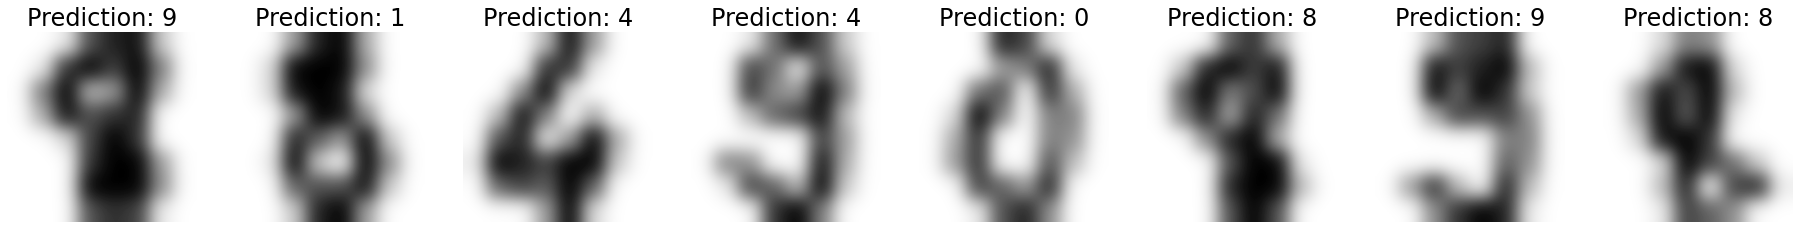

In [12]:
'''
Now let's apply the trained nn to the validation set

'''
expected = digits.target[n_samples//2:]
predicted = classifier.predict(data[n_samples//2:])

print("\nFor the classifier, {}".format(classifier, metrics.classification_report(expected, predicted)))

print("this is the classification report:\n{}\n".format(metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n{}\n".format(metrics.confusion_matrix(expected, predicted)))

print('Examples of predictions from the validation set:')
images_and_predictions = list(zip(digits.images[n_samples//2:], predicted))
plt.figure(figsize=(32,4))
num=8
for index, (image, prediction) in enumerate(images_and_predictions[:num]):
    plt.subplot(1, num, index+1)  
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='gaussian')
    plt.title('Prediction: {:d}'.format(prediction), fontsize=24)

plt.show()

### Use train_test_split()

In [13]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

this is the classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        88
           1       0.88      0.78      0.83        91
           2       0.97      0.81      0.89        86
           3       0.75      0.74      0.74        91
           4       0.86      0.91      0.88        92
           5       0.67      0.96      0.79        91
           6       0.95      0.98      0.96        91
           7       0.96      0.78      0.86        89
           8       0.74      0.65      0.69        88
           9       0.73      0.77      0.75        92

    accuracy                           0.83       899
   macro avg       0.84      0.83      0.83       899
weighted avg       0.84      0.83      0.83       899


Confusion matrix:
[[80  0  0  0  1  7  0  0  0  0]
 [ 0 71  1  1  0  0  0  0 10  8]
 [ 7  1 70  8  0  0  0  0  0  0]
 [ 0  2  0 67  0 10  1  1  7  3]
 [ 0  0  0  0 84  0  3  1  0  4]
 [ 0  1  0  1  1 87  1

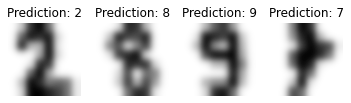

In [14]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(20,10), activation = 'relu', \
                    random_state=5, max_iter=10000, learning_rate_init=0.1)

clf.fit(X_train, y_train)


# print('Training score', clf.score(X_sub[:n_samples//2], y_sub[:n_samples//2]))

# expected = y_sub[n_samples//2:] #testing set
# predicted = clf.predict(X_sub[n_samples//2:])
# print('Validation score', clf.score(X_sub[n_samples//2:], y_sub[n_samples//2:]))

images_and_predictions = list(zip(X_train, y_train))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(1, 4, index+1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='gaussian')
    plt.title('Prediction: {}'.format(prediction))
    
y_pred = clf.predict(X_test)

print("this is the classification report:\n{}\n".format(metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n{}\n".format(metrics.confusion_matrix(expected, predicted)))


plt.show()

Examples of predictions from the validation set:


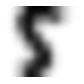

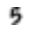

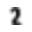

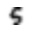

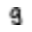

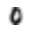

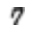

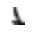

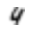

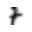

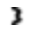

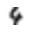

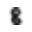

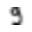

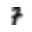

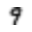

In [16]:
images_and_predictions = list(zip(X_test, y_pred))

print('Examples of predictions from the validation set:')
plt.figure(figsize=(24,3))
num=16
start=100

for index, (image, prediction) in enumerate(images_and_predictions[100:100+num]):
    plt.subplot(1, num, index+1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='gaussian')
#     plt.title('Val Pred: {:d}'.format(y_pred))
    plt.show()


## The Receiver Operating Characteristic  (ROC)

### What it is (an operational definition):

### Say we pick all images that correspond to the digit 6.  Set a threshold for y_score (probability that an image is 6), say 0.5, 

- ### count how many with probability > 0.5 are correct predctions (i.e., label = 6) -- these are the True Positives; 

- ### count how many with probability > 0.5 are incorrect predctions (i.e., label != 6)-- these are False Positives.  

### Remember you know the "ground truth" (the labels), and that's why you can do this.
### TPR = TP/P, when threshold is 0, TPR is 100, when threshold is 1, TPR is 0
### Likewise, FPR = FP/F, when threshold is 0, FPR is 100, when threshold is 1, FPR is 0 
### At every probability threshold value there is a TPR and a FPR. Get these TPR's and FPR's for a grid of threshold values between 0 and 1. If you then plot TPR vs. FPR, that's the ROC.
### Now, let's first understand what would FPR and TPR be for threshold = 0 and 1, and then try to sketch out what a ROC curve would look like for a well-trained classifier
### Question: How would the ROC curve for an untrained classifier look like?  (_Hint: let's again start with the extreme thresholds of 0 and 1_) 
It will be the same as for trained classfier for the extremes

for > 0.5, FPR will be 50% b/c it is random, and TPR is also 50%
for > 0.9, FPR will be 10% and TPR will be 10%

for untrained, FPR and TPR are always the same


### Breakout: 

### a) Find y_score
### b) plot ROC, and find the area under the ROC (or AUC), say for digit 3

     from sklearn.metrics import roc_curve, auc

In [110]:
y = digits.target

print('y shape before binariza: {}'.format(y.shape))

y_binary = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print('y shape AFTER binariza: {}'.format(y_binary.shape))
print('First 3 element of y_:\n',y[:3])
print('First 3 element of y_:\n',y_binary[:3])


y shape before binariza: (1797,)
y shape AFTER binariza: (1797, 10)
First 3 element of y_:
 [0 1 2]
First 3 element of y_:
 [[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]


In [111]:
y_score = clf.predict_proba(X_test)


In [117]:
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.5, random_state=0)

In [124]:

y_score = clf.predict_proba(X_test)

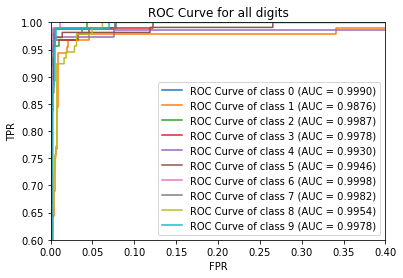

In [132]:
n_classes = y_binary.shape[1]
fpr = dict()
tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='ROC Curve of class {0} (AUC = {1:0.4f})'.format(i,roc_auc[i]))
plt.ylim(.6, 1)
plt.xlim(0, .4)
plt.title('ROC Curve for all digits')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

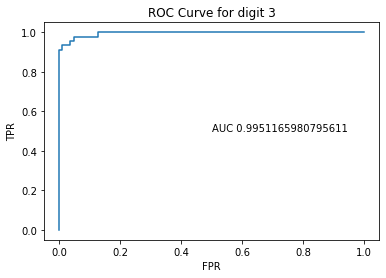

In [118]:
fpr3, tpr3, thresholds = roc_curve(y_test[:,3], y_score[:,3])
AUC3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3)
plt.title('ROC Curve for digit 3')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(.5, .5, 'AUC {}'.format(AUC3))
plt.show()

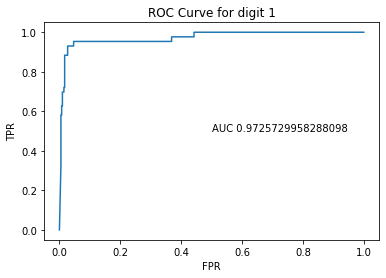

In [115]:
fpr1, tpr1, thresholds = roc_curve(y_test_binary[:,1], y_score[:,1])
AUC1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1)
plt.title('ROC Curve for digit 1')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(.5, .5, 'AUC {}'.format(AUC1))
plt.show()

In [52]:
print((y_pred.shap))

(450,)


Predicted Probabilities:  [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000
 0.00000]
Label:
 [0 0 0 0 0 0 0 0 1 0]


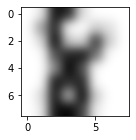

In [120]:
i = 1
print('Predicted Probabilities: ', y_score[i])
print('Label:\n', y_test[i])
plt.figure(figsize=(2, 2))
plt.imshow(X_test[i].reshape(8, -1), cmap='binary', interpolation='Gaussian')
plt.show()

In [51]:

sum_3=0
FPR = [] 
TPR = []
for i,x in enumerate(y_test):
    if(y_pred[i]==y_test[i] && y_test[i]==3):
        TPR.append(i)
#         print(x)
        sum_3+=1
print(sum_3)
# print(y_score)

# print(X_test.shape)

# print(y_test.shape)

42


# End of Week12-1